In [1]:
import lasio
import pozo
import pozo.units as pzu
import pozo.themes as pzt


In [2]:
las = lasio.read("./SALADIN.LAS")
#las.curves # I want pretty print!
pzu.check_las(las)


In [3]:
# Do Basic Checks
# Look at quality

#pozo.Graph(las).render(height=600, override_theme={"color":"black", "track_width":80})

In [4]:
include = ["CALI", "CGR", "LLS", "ILM", "ILD", "LLD", "NPHI", "RHOB"]
graph1 = pozo.Graph(las,  yaxis_name="DEPT:2", include=include, depth=[1080, 1180]) 

# Combining CGR CALI
graph1.combine_tracks("CGR", "CALI")

# Combining Conductivities
graph1.combine_tracks("LLD","ILD","ILM","LLS") 

# Combining NPHI RHOB
graph1.combine_tracks("RHOB", "NPHI")


In [5]:
graph1.set_theme("cangrejo")
graph1.get_theme().set_fallback("track_width", 100)
graph1.set_depth([1090, 1200])
#graph1.render(height=600, depth_position=0, show_depth=True)

In [6]:
%run -i 'VSH.py'

vhs_track_theme = { 
    "color": [
        "#ED0C0C",
        "#259E03",
        "#3EC2C0",
        "#032CFC",
        "#9C2D94"
    ],
    "range": [0, 1], # debemos agregar unas cosas al tema "cangrejo" 
    "range_units": "fraction",
    "axis_line": False,
}


graph1.pop_tracks("IGR", strict_index=False)
newTracks = []
for method in vsh_methods .keys():
    newTracks.append(create_vsh_track(graph1, method=method, from_log='CGR'))

newTracks[0].set_theme(vhs_track_theme)
graph1.combine_tracks(*newTracks)

In [7]:
#graph1.renderer.get_layout(graph1)

0.625
0.625
0.75
0.875
0.625
0.625
0.75
0.875
1.0


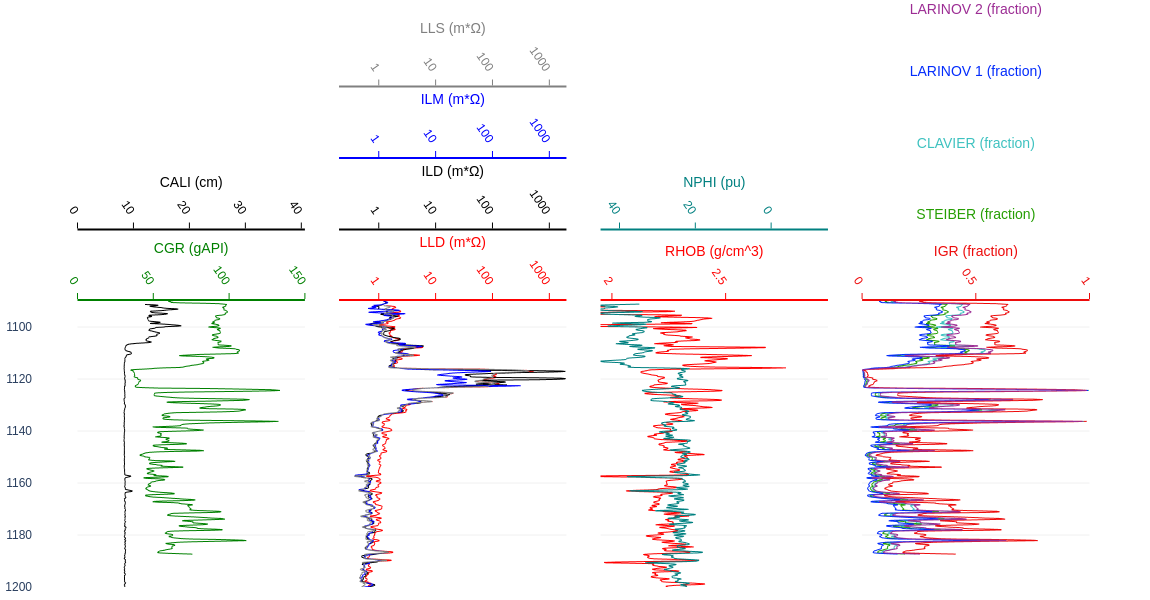

<IPython.core.display.Javascript object>

In [12]:
graph1.render(height=600, depth_position=0, show_depth=True)

In [9]:
fig = graph1.renderer.get_figure(graph1)

0.75
0.75
0.8333333333333334
0.9166666666666667
0.75
0.75
0.8333333333333334
0.9166666666666667
1.0


In [10]:
import pozo.renderers as pzr
tree = pzr.TreeTable()

In [11]:
tree.render(graph1)